In [ ]:
import numpy as np 
import os 
import sys
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, recall_score, make_scorer, f1_score
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, roc_auc_score
from sklearn.model_selection import cross_validate, LeaveOneOut, StratifiedKFold
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import shap
if sys.platform == 'darwin':
    print("Current system is macOS")
    main_fold_path = '/Users/shanxiafeng/Documents/Project/Research/fnirs-prognosis/code/fnirs-treatment-response-prediction'
elif sys.platform == 'linux':
    print("Current system is Ubuntu")
    main_fold_path = '/home/jy/Documents/fnirs/treatment_response/fnirs-depression-deeplearning'
else:
    print("Current system is neither macOS nor Ubuntu")
    
sys.path.append(main_fold_path)    
os.chdir(main_fold_path)
from utils.hyperopt_utils import get_best_hyperparameters, get_best_hyperparameters_skf_inside_loocv_monitoring_recall_bacc
from utils.fnirs_utils import print_md_table_val_test_AUC
from scripts.explanation.explanation_utils import show_ranked_shap_channel_importance
from LOO_nested_CV_model import build_model

In [14]:
itr_all = []
for i in range(4, 12):
    main_path = 'results/gnn_transformer/prognosis_mix_hb/pretreatment_response/ten_itr_retain_single_ch_performance_v{}.npy'.format(i)
    data = np.load(main_path)
    itr_all.append(data)
    
    print(data.shape)
    
itr_all = np.array(itr_all)


(5, 64, 52)
(5, 64, 52)
(5, 64, 52)
(5, 64, 52)
(5, 64, 52)
(5, 64, 52)
(5, 64, 52)
(5, 64, 52)


Ranked channels by importance: [41 30 10 20 40 29 51  8  9 19 21 31 32 22 11 42  4 18 43 47  6  7 39 12
 50 17  3  5 49  0 34 48 36 44 33 38 14  2 45 16 46 13 28 37 23 15 27 26
 24 35 25  1]


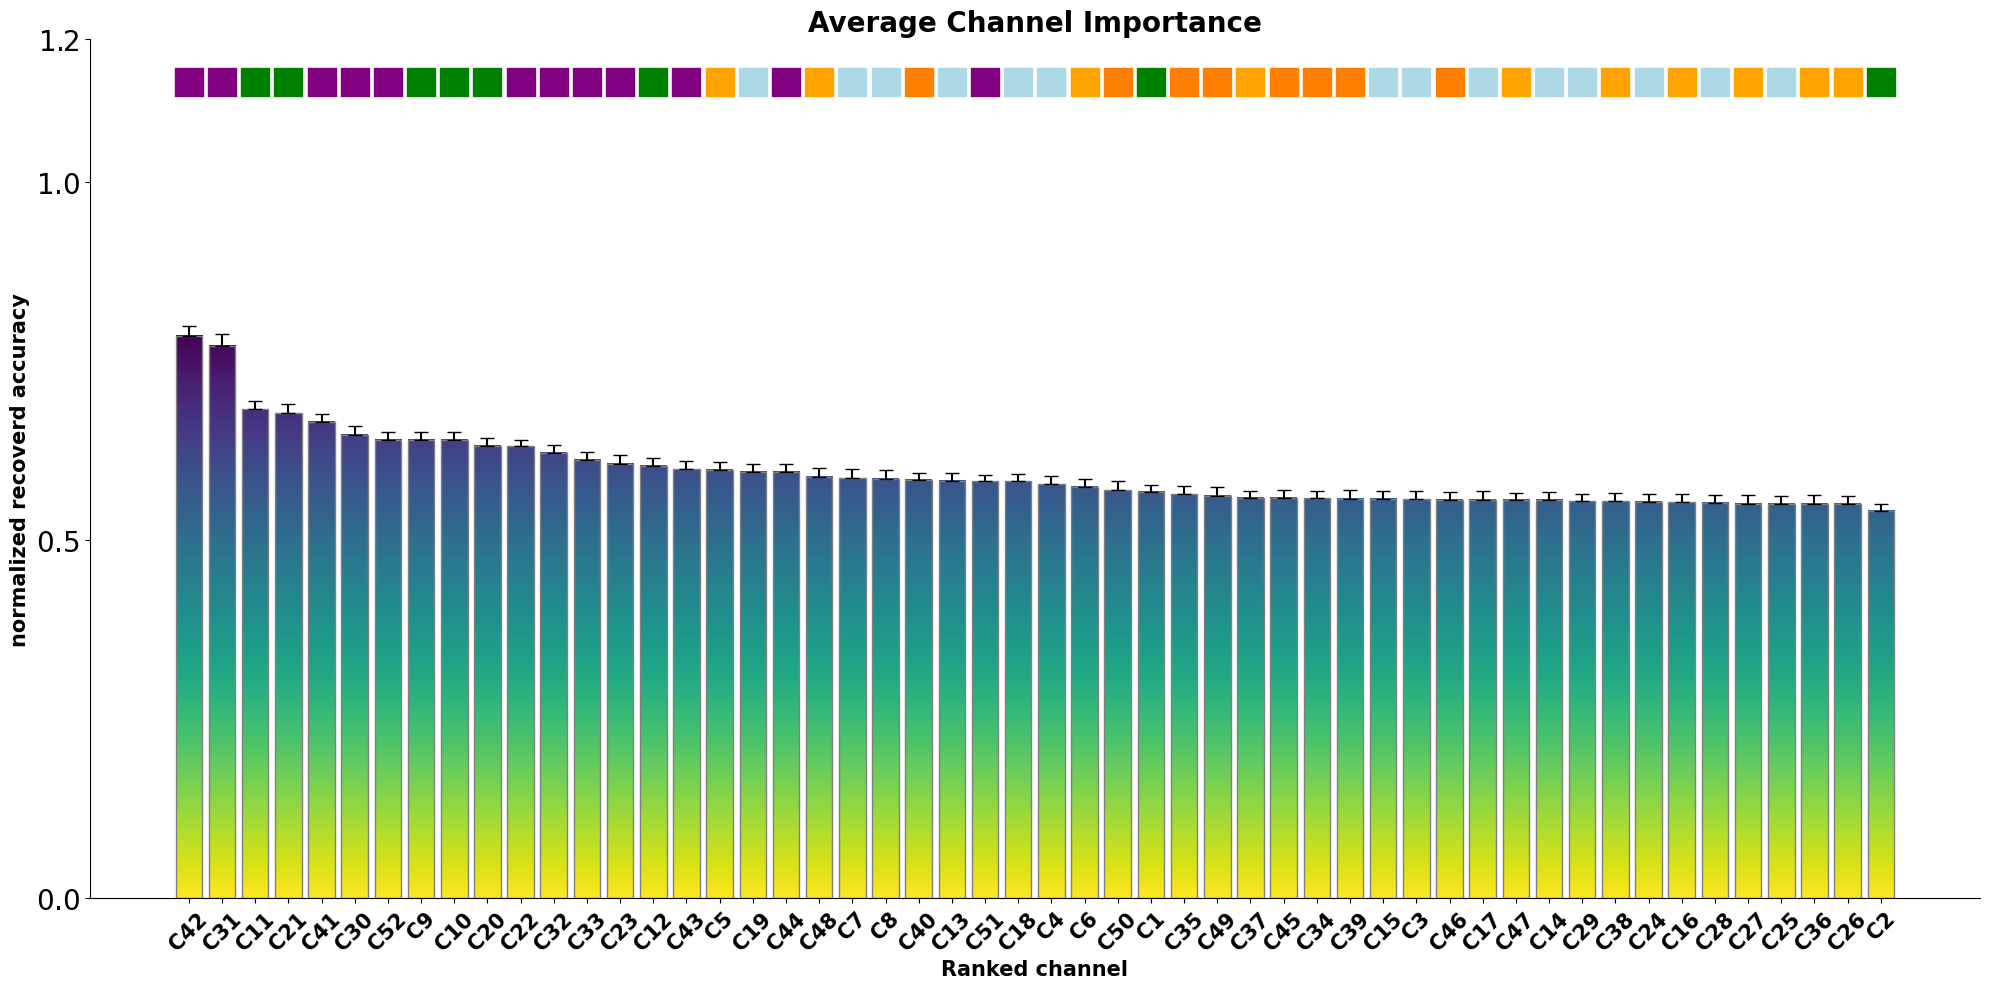

In [15]:
itr_all = np.mean(itr_all, axis=(1,2))
itr_all = (1 - itr_all)/np.max(itr_all)

show_ranked_shap_channel_importance(itr_all, y_label_name='normalized recoverd accuracy')
